<a href="https://colab.research.google.com/github/iris10130901/AI_Project/blob/main/R%E8%AA%9E%E8%A8%80%20%E9%9B%86%E7%BE%A4%E5%88%86%E6%9E%90%20%E7%BE%8E%E5%9C%8B%E9%9D%92%E5%B0%91%E5%B9%B4%E5%B8%82%E5%A0%B4%E5%8D%80%E9%9A%94%E6%A1%88%E4%BE%8B.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#集群分析 美國青少年市場區格案例 Clustering and market segmentation (100-01 R資料集群571行)

# 1 .  Facebook的使用者的習慣進行clustering分析

In [ ]:
# Facebook的使用者的習慣進行clustering分析  
# 1.問題定義及分析目標
# 1-1 青少年使用facebook用語 
# 1-2 很多商家垂涎青少年市場, 其希望販賣零食,飲料, 3c產品及衛生保健產品.
# 1-3 現在你有一份30000名學生的facebook的profile資訊 - 
# 1-4 其包含全文資料,入學年,性別,年齡及朋友數. 
# 1-5 我們要如何找出具相同品味的市場區隔,以針對目標進行行銷？　 
# 1-6 這時因為我們要找到的是target segment. (青少年之間的族群分類?)
# 1-7 很明顯的我們可以用分群的演算法來看看是否可以找到什麼有趣的東西
# 1-8 文字分辨運動、宗教、音樂、流行、羅曼史與反社會行為等等用語來做分群依據?
# 1-9 如何收集到這些資料的呢???   利用文字探勘抽出所有頁面的前500個字
#                                   選定這36字代表五類興趣!
#                                   課外活動、宗教、流行、羅曼史與反社會行為
# 1-10 例如: basketball, cute, sexy, music, shopping, die and drugs

In [ ]:
# 2.收集資料 
# 請先看看原始 snsdata.csv 資料
# gradyear,gender,age,friends,basketball,football,soccer,softball,volleyball,swimming,cheerleading,baseball,tennis,sports,cute,sex,sexy,hot,kissed,dance,band,marching,music,rock,god,church,jesus,bible,hair,dress,blonde,mall,shopping,clothes,hollister,abercrombie,die,death,drunk,drugs
# 2006,M,18.982,7,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
# 2006,F,18.801,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,2,2,1,0,0,0,6,4,0,1,0,0,0,0,0,0,0,0
# 2006,M,18.335,69,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
# 2006,F,18.875,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
# 2006,NA,18.995,10,0,0,0,0,0,0,0,0,0,0,0,1,0,0,5,1,1,0,3,0,1,0,0,0,1,0,0,0,2,0,0,0,0,0,1,1

In [ ]:
teens <- read.csv("/content/sample_data/snsdata.csv")
teens

gradyear,gender,age,friends,basketball,football,soccer,softball,volleyball,swimming,⋯,blonde,mall,shopping,clothes,hollister,abercrombie,die,death,drunk,drugs
<int>,<chr>,<dbl>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,⋯,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>
2006,M,18.982,7,0,0,0,0,0,0,⋯,0,0,0,0,0,0,0,0,0,0
2006,F,18.801,0,0,1,0,0,0,0,⋯,0,1,0,0,0,0,0,0,0,0
2006,M,18.335,69,0,1,0,0,0,0,⋯,0,0,0,0,0,0,0,1,0,0
2006,F,18.875,0,0,0,0,0,0,0,⋯,0,0,0,0,0,0,0,0,0,0
2006,NA,18.995,10,0,0,0,0,0,0,⋯,0,0,2,0,0,0,0,0,1,1
2006,F,NA,142,0,0,0,0,0,0,⋯,0,0,1,0,0,0,0,0,1,0
2006,F,18.930,72,0,0,0,0,0,0,⋯,0,2,0,0,2,0,0,0,0,0
2006,M,18.322,17,0,0,0,1,0,0,⋯,0,0,0,0,0,0,0,0,0,0
2006,F,19.055,52,0,0,0,0,0,0,⋯,0,0,0,0,0,0,0,0,0,0


In [ ]:
dim(teens)

[1] 30000    40

In [ ]:
names(teens)

[1] "gradyear"     "gender"       "age"          "friends"      "basketball"  
 [6] "football"     "soccer"       "softball"     "volleyball"   "swimming"    
[11] "cheerleading" "baseball"     "tennis"       "sports"       "cute"        
[16] "sex"          "sexy"         "hot"          "kissed"       "dance"       
[21] "band"         "marching"     "music"        "rock"         "god"         
[26] "church"       "jesus"        "bible"        "hair"         "dress"       
[31] "blonde"       "mall"         "shopping"     "clothes"      "hollister"   
[36] "abercrombie"  "die"          "death"        "drunk"        "drugs"

In [ ]:
# [1] 畢業年分，性别，年龄，朋友，藍球，
# [6] 足球，足球，壘球，排球，游泳
# [11]啦啦隊，棒球，網球，運動，可爱
# [16]性，性感，火熱，親吻，跳舞
# [21]樂隊，游行，音樂，摇滚，上帝
# [26]教会，耶稣，聖經，頭髮，禮服
# [31]金髮女孩，購物中心，購物，衣服，潮牌Hollister
# [36] Abercrombie & Fitch是一間美國的零售商, 死亡, 死亡，醉酒，毒品

In [ ]:
#理解資料
str(teens)

'data.frame':	30000 obs. of  40 variables:
 $ gradyear    : int  2006 2006 2006 2006 2006 2006 2006 2006 2006 2006 ...
 $ gender      : chr  "M" "F" "M" "F" ...
 $ age         : num  19 18.8 18.3 18.9 19 ...
 $ friends     : int  7 0 69 0 10 142 72 17 52 39 ...
 $ basketball  : int  0 0 0 0 0 0 0 0 0 0 ...
 $ football    : int  0 1 1 0 0 0 0 0 0 0 ...
 $ soccer      : int  0 0 0 0 0 0 0 0 0 0 ...
 $ softball    : int  0 0 0 0 0 0 0 1 0 0 ...
 $ volleyball  : int  0 0 0 0 0 0 0 0 0 0 ...
 $ swimming    : int  0 0 0 0 0 0 0 0 0 0 ...
 $ cheerleading: int  0 0 0 0 0 0 0 0 0 0 ...
 $ baseball    : int  0 0 0 0 0 0 0 0 0 0 ...
 $ tennis      : int  0 0 0 0 0 0 0 0 0 0 ...
 $ sports      : int  0 0 0 0 0 0 0 0 0 0 ...
 $ cute        : int  0 1 0 1 0 0 0 0 0 1 ...
 $ sex         : int  0 0 0 0 1 1 0 2 0 0 ...
 $ sexy        : int  0 0 0 0 0 0 0 1 0 0 ...
 $ hot         : int  0 0 0 0 0 0 0 0 0 1 ...
 $ kissed      : int  0 0 0 0 5 0 0 0 0 0 ...
 $ dance       : int  1 0 0 0 1 0 0 0 0 0 ...
 $

## 探索與準備資料 01
- 先針對 data frame 做 summary 敘述性統計
- 第一步 我們要先知道是否資料完整 也就是沒有遺缺值(NA) *
- 發現gender and age (性別與年齡) 有遺落值 NA
- NAs only in gender and age

In [ ]:
summary(teens)  #age遺漏值

    gradyear       gender               age             friends      
 Min.   :2006   Length:30000       Min.   :  3.086   Min.   :  0.00  
 1st Qu.:2007   Class :character   1st Qu.: 16.312   1st Qu.:  3.00  
 Median :2008   Mode  :character   Median : 17.287   Median : 20.00  
 Mean   :2008                      Mean   : 17.994   Mean   : 30.18  
 3rd Qu.:2008                      3rd Qu.: 18.259   3rd Qu.: 44.00  
 Max.   :2009                      Max.   :106.927   Max.   :830.00  
                                   NA's   :5086                      
   basketball         football           soccer           softball      
 Min.   : 0.0000   Min.   : 0.0000   Min.   : 0.0000   Min.   : 0.0000  
 1st Qu.: 0.0000   1st Qu.: 0.0000   1st Qu.: 0.0000   1st Qu.: 0.0000  
 Median : 0.0000   Median : 0.0000   Median : 0.0000   Median : 0.0000  
 Mean   : 0.2673   Mean   : 0.2523   Mean   : 0.2228   Mean   : 0.1612  
 3rd Qu.: 0.0000   3rd Qu.: 0.0000   3rd Qu.: 0.0000   3rd Qu.: 0.0000  
 M

In [ ]:
stem(teens$age,scale=1,width=80)


  The decimal point is 1 digit(s) to the right of the |

   0 | 34444455555555555555666666666788888888889999
   1 | 12222222333333334444444444444444444444444444444444455555555555555555+24221
   2 | 00000000000000000000000000000000000000000000000000000000000000000000+240
   3 | 022334477777777888889
   4 | 12222345555667
   5 | 0122778
   6 | 013445678
   7 | 368899
   8 | 0134466777899
   9 | 0024444555667889
  10 | 11123333344444445555555666666666666666666666666666666666666666666666+83



In [ ]:
stem(teens$friends,scale=1,width=80)


  The decimal point is 2 digit(s) to the right of the |

  0 | 00000000000000000000000000000000000000000000000000000000000000000000+22584
  0 | 55555555555555555555555555555555555555555555555555555555555555555555+5658
  1 | 00000000000000000000000000000000000000000000000000000000000000000000+1061
  1 | 55555555555555555555555555555555555555555555555555555555555555555555+227
  2 | 00000000000000000000000000111111111111111111112222222222222223333333+8
  2 | 55555555566666666667777777777777888899
  3 | 001111112223
  3 | 66678
  4 | 
  4 | 6
  5 | 24
  5 | 9
  6 | 1
  6 | 
  7 | 
  7 | 9
  8 | 3



## 探索與準備資料 02 處理遺漏值
- look at missing data for gender variable
- 在這里 你看以發現 只有 age及gender兩個變數 有不少NA

In [ ]:
sum(is.na(teens$gender))

[1] 2724

In [ ]:
sum(is.na(teens$age))

[1] 5086

In [ ]:
# 哪些儲存格是 NA
which(is.na(teens), arr.ind=T)

row,col
5,2
14,2
16,2
17,2
42,2
49,2
69,2
71,2
72,2
83,2


In [ ]:
#我們來細看 gender的NA數量
table(teens$gender)   #利用 table 找出性別分佈，但是並沒有顯示 NA


    F     M 
22054  5222 

In [ ]:
# 我們來細看 性別 gender的NA數量， table 如何有顯示 NA數量 >>> useNA = "ifany"
table(teens$gender, useNA = "ifany") # 9% of NAs, female is five times of male


    F     M  <NA> 
22054  5222  2724 

In [ ]:
table(teens$gender, useNA = "always")


    F     M  <NA> 
22054  5222  2724 

In [ ]:
# 我們來細看 gradyear 的NA數量
table(teens$gradyear, useNA = "always")


2006 2007 2008 2009 <NA> 
7500 7500 7500 7500    0 

In [ ]:
# 我們來細看 年齡 age 的NA數量  為何不用 table 看 age >>> 數值型(分類就太多囉!)
table(teens$age, useNA = "ifany")


  3.086    3.63   4.309   4.394   4.422   4.449   4.643   4.668   4.736    4.75 
      1       1       1       1       1       1       1       1       1       1 
  4.783   4.906   4.917   4.928   4.931   5.194   5.207   5.232   5.235   5.451 
      1       1       1       1       1       1       1       1       1       1 
  5.572   5.815   5.867   5.927   5.936   5.982   6.198   6.234   6.297   7.365 
      1       1       1       1       1       1       1       1       1       1 
   8.14   8.159   8.318   8.323   8.361    8.37   8.383   8.402   8.441   8.498 
      1       1       1       1       1       1       1       1       1       1 
  8.594   8.772   8.808   9.079  10.842  11.559  11.639  11.841   12.29   12.35 
      1       1       1       1       1       1       1       1       1       1 
 12.392  12.854  13.027  13.112  13.123  13.139  13.396  13.462   13.47  13.544 
      2       1       1       1       1       1       1       1       1       1 
 13.569  13.577  13.719  13

In [ ]:
# look at missing data for age variable  >>> 數值型 用 summary() 查看 NA
summary(teens$age)

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max.    NA's 
  3.086  16.312  17.287  17.994  18.259 106.927    5086 

年紀還有3 歲的青少年嗎?年紀還106 歲的青少年嗎?

In [ ]:
# 先處理 NA 與 不合理值
# 好! 我們還記得我們要找的是青少年的使用者, 
# 所以我們以年齡13到20歲去extract 取代我們age中的資料超過範圍就用NA取代
teens$age <- ifelse(teens$age >= 13 & teens$age < 20, teens$age, NA)  #用NA取代

In [ ]:
# 了解 ifelse 的用法嗎???
?ifelse
# ifelse(test, yes, no)

# 5523 - 5086 = 437 NAs added NA取代 437個

In [ ]:
summary(teens$age)

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max.    NA's 
  13.03   16.30   17.27   17.25   18.22   20.00    5523 

## 探索與準備資料 03 處理gender的遺缺值(NA)
- 對性別的女性值進行虛擬編碼與遺缺值(NA)虛擬編碼(dummy coding)
- gender原始值為 M, F 及 NA
- 一般而言我們把NA當作unknown在將其性別個別拉出分成male 及 female 在給予編碼

In [ ]:
# reassign missing gender values to "unknown"
teens$female  #欲產生新的變數 female 紀錄女性值

NULL

In [ ]:
table(teens$gender, useNA = "ifany")


    F     M  <NA> 
22054  5222  2724 

In [ ]:
#虛擬編碼 1 for Male, 0 for Female
teens$female <- ifelse(teens$gender == "F" & !is.na(teens$gender), 1, 0) 
teens$female

[1] 0 1 0 1 0 1 1 0 1 1 1 1 1 0 1 0 0 1 1 1 1 0 1 1 1 0 1 0 1 1 1 1 1 0 1 0
   [37] 1 1 1 1 1 0 1 0 1 1 1 1 0 0 1 0 1 1 0 1 1 0 0 1 1 0 1 0 1 1 1 1 0 0 0 0
   [73] 0 1 1 1 1 1 1 1 0 0 0 1 1 0 0 1 1 1 0 1 1 1 0 1 1 1 0 1 1 1 1 1 1 1 1 1
  [109] 1 1 1 1 0 1 1 0 1 1 1 1 1 1 1 1 0 1 1 1 1 0 0 1 0 1 1 1 1 0 1 1 0 1 0 1
  [145] 1 1 1 1 1 1 0 1 1 1 1 0 1 0 1 1 0 1 1 1 1 0 1 1 1 1 1 0 1 0 0 1 1 1 1 0
  [181] 0 1 1 1 1 1 1 1 1 1 1 0 0 1 1 0 1 0 0 1 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1
  [217] 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 0 0 0 0 1
  [253] 0 0 1 0 1 0 1 1 0 1 0 0 1 1 0 0 0 1 1 1 1 1 1 0 1 1 0 1 1 1 1 1 1 0 1 1
  [289] 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 0 1 1 1 1 1 1 1 1 1 0 1 0 1 1 1 1 0
  [325] 1 1 1 1 0 1 1 1 1 0 1 1 0 1 1 1 1 1 1 1 0 1 1 0 1 1 0 1 1 0 1 1 0 1 1 0
  [361] 0 0 1 0 0 0 0 0 1 0 1 0 0 1 0 1 0 1 1 0 1 0 0 0 0 0 1 1 0 1 0 1 1 1 1 1
  [397] 1 1 1 0 1 1 1 1 0 1 1 0 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1
  [433] 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 0 0 1 0 1 0 0 1 0 1 1 1 1 0
  [469] 1 1 0 0 1 1 1 0 1 1 1 1 1 0 1 1 0 1 0 1 1 1 1 0 0 1 1 0 1 1 1 1 1 0 0 1
  [505] 1 1 1 1 0 0 1 1 1 1 1 0 1 1 0 1 1 1 1 1 0 1 0 0 1 1 0 1 1 1 1 0 1 1 1 0
  [541] 1 1 1 1 1 1 1 0 0 0 1 1 1 1 1 1 1 1 1 1 0 0 1 1 1 1 1 1 1 1 1 0 1 1 1 1
  [577] 0 0 1 1 1 1 1 1 0 0 0 1 1 0 0 1 1 1 1 0 1 0 1 0 1 0 0 1 1 1 1 1 0 0 1 1
  [613] 1 0 1 1 1 1 1 1 1 1 1 1 1 1 0 0 1 0 1 0 0 0 0 0 0 0 0 0 1 0 0 1 0 1 1 1
  [649] 0 1 0 1 0 0 1 1 1 1 0 1 1 0 1 0 1 0 1 0 0 0 1 0 0 0 1 0 1 0 1 1 0 0 0 1
  [685] 1 1 1 1 1 0 0 0 1 0 1 0 0 1 0 0 0 1 0 0 1 0 1 0 1 0 0 1 1 1 0 1 1 1 0 1
  [721] 1 1 1 1 1 0 1 1 1 1 0 1 1 1 1 1 0 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
  [757] 1 1 1 1 1 1 0 1 1 1 0 1 1 1 1 0 1 1 1 0 0 1 1 0 0 0 1 1 1 0 1 1 0 0 0 1
  [793] 0 0 0 1 0 0 0 0 0 1 1 0 1 1 1 0 0 0 1 0 1 1 1 1 0 1 1 1 1 1 1 0 0 1 1 0
  [829] 1 1 0 1 1 1 0 1 1 1 1 0 1 0 0 1 1 1 1 1 1 1 0 1 0 1 1 1 1 1 0 1 1 1 1 0
  [865] 1 0 1 1 1 1 1 1 1 1 0 1 1 0 1 1 1 1 0 1 1 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1
  [901] 1 0 1 0 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 0 1 1 0 1 1 0 1 1 1 1 1 0 1 1 1 1
  [937] 1 1 0 1 1 1 1 1 1 1 0 1 0 1 1 1 1 1 0 1 0 1 0 0 0 1 1 0 1 1 0 1 1 1 1 1
  [973] 1 1 1 1 1 1 1 0 1 1 1 1 0 1 0 0 1 1 0 1 1 0 1 0 1 1 0 1 1 0 1 1 1 1 1 1
 [1009] 0 1 0 1 1 1 0 1 1 0 1 1 1 0 0 1 1 0 0 0 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 [1045] 1 1 1 0 0 1 1 1 0 1 0 1 1 1 1 0 1 1 0 0 1 1 1 0 1 1 1 0 1 0 1 1 1 1 1 1
 [1081] 1 1 1 1 0 1 1 1 1 0 0 1 0 1 0 1 0 0 0 0 1 1 1 1 0 1 1 0 0 0 1 1 1 1 1 0
 [1117] 1 0 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 0 0 0 1 1 1 1 1
 [1153] 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 0 1 0 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1
 [1189] 1 1 0 1 1 1 1 0 1 1 0 0 0 0 1 1 1 1 1 1 1 0 0 0 1 0 1 0 0 1 0 1 0 1 1 1
 [1225] 1 1 1 1 1 1 0 1 1 1 1 1 1 0 1 0 1 1 1 1 1 1 1 1 1 1 1 0 1 0 1 0 1 0 1 0
 [1261] 0 0 0 1 1 0 1 1 0 1 0 1 1 0 0 1 1 1 0 0 1 0 0 1 0 1 0 1 1 1 0 0 1 0 0 0
 [1297] 1 1 1 1 1 0 0 1 1 1 0 0 1 0 1 1 1 0 1 0 1 1 1 1 0 1 1 0 1 1 1 0 1 1 1 0
 [1333] 1 0 0 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1
 [1369] 0 0 1 1 1 0 1 1 0 1 1 0 1 0 1 1 1 0 1 1 1 1 1 0 1 0 1 1 1 1 0 1 0 1 1 1
 [1405] 0 1 0 0 1 1 1 1 1 0 1 1 0 0 1 0 1 1 1 1 1 0 1 0 1 1 1 1 1 1 0 1 1 1 0 0
 [1441] 1 0 1 1 1 1 1 1 1 1 0 1 0 1 1 1 0 0 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1
 [1477] 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 0 1 1 0 1 0 1 1 1 1 0 1 0 0 1 1 1 0 0
 [1513] 1 1 1 0 1 1 1 0 0 0 1 1 1 1 0 0 1 1 1 1 0 1 1 0 1 1 1 1 1 1 1 0 1 0 0 1
 [1549] 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 0 1 1 1 0 0 1 1 0 1 1 1 1 1 0 1 1 1
 [1585] 1 0 0 1 0 0 0 1 0 0 0 1 1 1 1 1 0 0 0 1 1 1 1 0 1 1 1 1 1 1 0 1 1 0 0 0
 [1621] 0 1 0 0 0 1 1 1 1 1 1 0 1 0 1 1 1 1 1 1 1 1 1 1 0 1 0 0 0 1 1 1 0 0 1 0
 [1657] 1 1 1 0 0 0 1 1 1 0 1 0 0 0 0 1 1 0 1 1 1 0 1 0 0 1 0 1 0 0 1 0 0 0 0 1
 [1693] 1 1 1 0 1 1 1 0 1 0 0 0 0 0 0 0 0 0 1 1 0 0 0 0 0 1 1 1 1 1 1 1 0 1 0 1
 [1729] 1 0 1 1 1 1 1 0 0 1 1 1 0 1 1 1 1 0 1 0 1 0 0 1 1 1 0 0 1 0 0 1 1 1 0 1
 [1765] 0 0 0 1 1 0 1 1 1 1 0 1 1 1 1 0 0 1 0 1 1 1 1 1 1 1 0 1 0 1 1 0 0 0 1 0
 [18

In [ ]:
table(teens$female)
# 7946 22054 
# 7946 = 5222+2724  NA 加給 Male 男性


    0     1 
 7946 22054 

In [ ]:
# 常見的邏輯判斷符號
# 
# 以下介紹常見的邏輯判斷的符號。
# <、>：小於、大於。
# <=、>=：小於等於、大於等於。
# ==、!=：等於、不等於。
# A %in% B：A 是否在 B 中。
# &&、＆:交集，& 適用於向量式的邏輯判斷，&& 適用於單一值的邏輯判斷。
# ||、|：聯集，| 適用狀況與 & 相同，|| 適用狀況與 && 相同。

In [ ]:
z = c(1,2,3)
z > 0 & z > -1
# &&只可以比較單一值，所以只有抓 z 的第一元素跟 0 與 -1 比較。
#[1] TRUE

[1] TRUE TRUE TRUE

In [ ]:
#  end of 常見的邏輯判斷符號

teens$no_gender

NULL

In [ ]:
# 遺缺值(NA)虛擬編碼(dummy coding)
teens$no_gender <- ifelse(is.na(teens$gender), 1, 0)
teens$no_gender

[1] 0 0 0 0 1 0 0 0 0 0 0 0 0 1 0 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
   [37] 0 0 0 0 0 1 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 1 1
   [73] 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0
  [109] 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 1 1 0 1 0 0 0 0 1 0 0 0 0 0 0
  [145] 0 0 0 0 0 0 1 0 0 0 0 1 0 1 0 0 1 0 0 0 0 1 0 0 0 0 0 0 0 1 0 0 0 0 0 1
  [181] 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
  [217] 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0
  [253] 0 1 0 1 0 0 0 0 0 0 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0
  [289] 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
  [325] 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0
  [361] 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 1 1 0 0 0 0 0 0 0 0 0 0
  [397] 0 0 0 1 0 0 0 0 1 0 0 1 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
  [433] 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0
  [469] 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
  [505] 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0
  [541] 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0
  [577] 0 0 0 0 0 0 0 0 1 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0
  [613] 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0
  [649] 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 1 0 0 0 0 1 0 0 0
  [685] 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 1 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 1 0
  [721] 0 0 0 0 0 1 0 0 0 0 1 0 0 0 0 0 1 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
  [757] 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 1 0 0 0 0 0 0 0 1 0 0
  [793] 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0
  [829] 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 1
  [865] 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0
  [901] 0 1 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 1 0 0 1 0 0 0 0 0 0 0 0 0 0
  [937] 0 0 1 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0
  [973] 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 1 0 0 0 0 0 0
 [1009] 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 [1045] 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 [1081] 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 1 1 0 0 0 0 0 0 0 0 1 1 1 0 0 0 0 0 0
 [1117] 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 1 0 0 0 0 0 0
 [1153] 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 [1189] 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 1 0 1 0 0 0
 [1225] 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 [1261] 0 0 1 0 0 0 0 0 1 0 0 0 0 1 0 0 0 0 0 1 0 0 0 0 1 0 0 0 0 0 0 0 0 1 0 0
 [1297] 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0
 [1333] 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0
 [1369] 0 0 0 0 0 1 0 0 0 0 0 1 0 0 0 0 0 1 0 0 0 0 0 1 0 0 0 0 0 0 0 0 1 0 0 0
 [1405] 1 0 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 [1441] 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0
 [1477] 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0
 [1513] 0 0 0 1 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 1 1 0
 [1549] 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0
 [1585] 0 1 0 0 1 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0
 [1621] 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 1 0 0
 [1657] 0 0 0 0 0 0 0 0 0 0 0 1 1 0 1 0 0 0 0 0 0 0 0 1 0 0 1 0 0 1 0 0 0 0 0 0
 [1693] 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 [1729] 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0
 [1765] 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 1 0 0 1 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0
 [18

In [ ]:
#我們看一下剛剛的改變, 是不是已經把NA分開了
table(teens$no_gender)


    0     1 
27276  2724 

In [ ]:
# check our recoding work
table(teens$gender, useNA = "ifany")


    F     M  <NA> 
22054  5222  2724 

In [ ]:
table(teens$female, useNA = "ifany")


    0     1 
 7946 22054 

In [ ]:
table(teens$no_gender, useNA = "ifany")


    0     1 
27276  2724 

## 探索與準備資料 04  年齡遺漏值填補(imputation)，以同年級平均年齡填補
- 利用 aggregate and ave  函數
- Why imputation???? 因為多數統計函數須將NA值移除後才能計算。

- 下一步 我們來處理新的age segment中的NA值
- 接下來的手法是所謂imputation - 就是用同年級 - 
- 也就是gradyear (從2006~ 2009年)的平均年齡來替換NA的部分

In [ ]:
mean(teens$age) # doesn't work, return 'NA'

[1] NA

In [ ]:
summary(teens$age)

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max.    NA's 
  13.03   16.30   17.27   17.25   18.22   20.00    5523 

- 有發現嗎? 如果數值資料中有NA, R不能計算而直接return NA
- 所以你加入 na.rm = TRUE的參數給mean()

In [ ]:
mean(teens$age, na.rm = TRUE)

[1] 17.25243

- 依據學年(gradyear)將青少年分組 << 使用 aggregate
- 在計算各組平均年齡(NA 需排除 na.rm = TRUE)

- 我們現在來使用 aggregate及ave來組合我們要作的工作
- 找出忽略na的欄位並已gradyear為準, age的平均數為何

In [ ]:
aggregate(data = teens, age ~ gradyear, FUN = mean, na.rm = TRUE) # finding the mean age by cohort

gradyear,age
<int>,<dbl>
2006,18.65586
2007,17.70617
2008,16.76770
2009,15.81957


aggregate函數
- 這個函數的功能比較強大，它首先將數據進行分組（按行），然後對每一組數據進行函數統計，最後把結果組合成一個比較nice的表格返回。根據數據對象不同它有三種用法，分別應用於數據框（data.frame）、公式（formula）和時間序列（ts）：
- aggregate(x, by, FUN, ..., simplify = TRUE) 
- aggregate(formula, data, FUN, ..., subset, nana.action = na.omit) 
- aggregate(x, nfrequency = 1, FUN = sum, ndeltat = 1, ts.eps = getOption("ts.eps"), ...)

In [ ]:
str(mtcars)

'data.frame':	32 obs. of  11 variables:
 $ mpg : num  21 21 22.8 21.4 18.7 18.1 14.3 24.4 22.8 19.2 ...
 $ cyl : num  6 6 4 6 8 6 8 4 4 6 ...
 $ disp: num  160 160 108 258 360 ...
 $ hp  : num  110 110 93 110 175 105 245 62 95 123 ...
 $ drat: num  3.9 3.9 3.85 3.08 3.15 2.76 3.21 3.69 3.92 3.92 ...
 $ wt  : num  2.62 2.88 2.32 3.21 3.44 ...
 $ qsec: num  16.5 17 18.6 19.4 17 ...
 $ vs  : num  0 0 1 1 0 1 0 1 1 1 ...
 $ am  : num  1 1 1 0 0 0 0 0 0 0 ...
 $ gear: num  4 4 4 3 3 3 3 4 4 4 ...
 $ carb: num  4 4 1 1 2 1 4 2 2 4 ...


先用attach函數把mtcars的列變量名稱加入到變量搜索範圍內，然後使用aggregate函數按cyl（汽缸數）進行分類計算平均值：

In [ ]:
attach(mtcars)

In [ ]:
aggregate(mtcars, by=list(cyl), FUN=mean)

Group.1,mpg,cyl,disp,hp,drat,wt,qsec,vs,am,gear,carb
<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
4,26.66364,4,105.1364,82.63636,4.070909,2.285727,19.13727,0.9090909,0.7272727,4.090909,1.545455
6,19.74286,6,183.3143,122.28571,3.585714,3.117143,17.97714,0.5714286,0.4285714,3.857143,3.428571
8,15.10000,8,353.1000,209.21429,3.229286,3.999214,16.77214,0.0000000,0.1428571,3.285714,3.500000


In [ ]:
# by参數也可以包含多個類型的因子，得到的就是每個不同因子組合的統計結果：
aggregate(mtcars, by=list(cyl, gear), FUN=mean)

Group.1,Group.2,mpg,cyl,disp,hp,drat,wt,qsec,vs,am,gear,carb
<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
4,3,21.500,4,120.1000,97.0000,3.700000,2.465000,20.0100,1.0,0.00,3,1.000000
6,3,19.750,6,241.5000,107.5000,2.920000,3.337500,19.8300,1.0,0.00,3,1.000000
8,3,15.050,8,357.6167,194.1667,3.120833,4.104083,17.1425,0.0,0.00,3,3.083333
4,4,26.925,4,102.6250,76.0000,4.110000,2.378125,19.6125,1.0,0.75,4,1.500000
6,4,19.750,6,163.8000,116.5000,3.910000,3.093750,17.6700,0.5,0.50,4,4.000000
4,5,28.200,4,107.7000,102.0000,4.100000,1.826500,16.8000,0.5,1.00,5,2.000000
6,5,19.700,6,145.0000,175.0000,3.620000,2.770000,15.5000,0.0,1.00,5,6.000000
8,5,15.400,8,326.0000,299.5000,3.880000,3.370000,14.5500,0.0,1.00,5,6.000000


In [ ]:
#公式（formula）是一種特殊的R數據對象，在aggregate函數中使用公式参數可以對數據框的部分指標進行統計：
aggregate(cbind(mpg,hp) ~ cyl+gear, FUN=mean) 

cyl,gear,mpg,hp
<dbl>,<dbl>,<dbl>,<dbl>
4,3,21.500,97.0000
6,3,19.750,107.5000
8,3,15.050,194.1667
4,4,26.925,76.0000
6,4,19.750,116.5000
4,5,28.200,102.0000
6,5,19.700,175.0000
8,5,15.400,299.5000


- 上面的公式 cbind(mpg,hp) ~ cyl+gear 表示使用 cyl 和 gear 的因子組合對 cbind(mpg,hp) 數據進行操作。
- aggregate在時間序列數據上的應用請参考R的函數說明文檔。


### 創建30000名青少年依據學年的分組平均年齡向量
- 我們接下來已平均值, avg_age去替換age中na的部分
- calculating the expected age for each person according to her/his gradyear

In [ ]:
ave_age <- ave(teens$age, teens$gradyear, FUN = function(x) mean(x, na.rm = TRUE)) 

In [ ]:
# you have to create a function, otherwise...

ave_age[1:50]

[1] 18.65586 18.65586 18.65586 18.65586 18.65586 18.65586 18.65586 18.65586
 [9] 18.65586 18.65586 18.65586 18.65586 18.65586 18.65586 18.65586 18.65586
[17] 18.65586 18.65586 18.65586 18.65586 18.65586 18.65586 18.65586 18.65586
[25] 18.65586 18.65586 18.65586 18.65586 18.65586 18.65586 18.65586 18.65586
[33] 18.65586 18.65586 18.65586 18.65586 18.65586 18.65586 18.65586 18.65586
[41] 18.65586 18.65586 18.65586 18.65586 18.65586 18.65586 18.65586 18.65586
[49] 18.65586 18.65586

In [ ]:
table(ave_age)

ave_age
15.8195733445096 16.7677007371007 17.7061723749799 18.6558579508727 
            7500             7500             7500             7500 

In [ ]:
ave_age

[1] 18.65586 18.65586 18.65586 18.65586 18.65586 18.65586 18.65586 18.65586
    [9] 18.65586 18.65586 18.65586 18.65586 18.65586 18.65586 18.65586 18.65586
   [17] 18.65586 18.65586 18.65586 18.65586 18.65586 18.65586 18.65586 18.65586
   [25] 18.65586 18.65586 18.65586 18.65586 18.65586 18.65586 18.65586 18.65586
   [33] 18.65586 18.65586 18.65586 18.65586 18.65586 18.65586 18.65586 18.65586
   [41] 18.65586 18.65586 18.65586 18.65586 18.65586 18.65586 18.65586 18.65586
   [49] 18.65586 18.65586 18.65586 18.65586 18.65586 18.65586 18.65586 18.65586
   [57] 18.65586 18.65586 18.65586 18.65586 18.65586 18.65586 18.65586 18.65586
   [65] 18.65586 18.65586 18.65586 18.65586 18.65586 18.65586 18.65586 18.65586
   [73] 18.65586 18.65586 18.65586 18.65586 18.65586 18.65586 18.65586 18.65586
   [81] 18.65586 18.65586 18.65586 18.65586 18.65586 18.65586 18.65586 18.65586
   [89] 18.65586 18.65586 18.65586 18.65586 18.65586 18.65586 18.65586 18.65586
   [97] 18.65586 18.65586 18.65586 18.65586 18.65586 18.65586 18.65586 18.65586
  [105] 18.65586 18.65586 18.65586 18.65586 18.65586 18.65586 18.65586 18.65586
  [113] 18.65586 18.65586 18.65586 18.65586 18.65586 18.65586 18.65586 18.65586
  [121] 18.65586 18.65586 18.65586 18.65586 18.65586 18.65586 18.65586 18.65586
  [129] 18.65586 18.65586 18.65586 18.65586 18.65586 18.65586 18.65586 18.65586
  [137] 18.65586 18.65586 18.65586 18.65586 18.65586 18.65586 18.65586 18.65586
  [145] 18.65586 18.65586 18.65586 18.65586 18.65586 18.65586 18.65586 18.65586
  [153] 18.65586 18.65586 18.65586 18.65586 18.65586 18.65586 18.65586 18.65586
  [161] 18.65586 18.65586 18.65586 18.65586 18.65586 18.65586 18.65586 18.65586
  [169] 18.65586 18.65586 18.65586 18.65586 18.65586 18.65586 18.65586 18.65586
  [177] 18.65586 18.65586 18.65586 18.65586 18.65586 18.65586 18.65586 18.65586
  [185] 18.65586 18.65586 18.65586 18.65586 18.65586 18.65586 18.65586 18.65586
  [193] 18.65586 18.65586 18.65586 18.65586 18.65586 18.65586 18.65586 18.65586
  [201] 18.65586 18.65586 18.65586 18.65586 18.65586 18.65586 18.65586 18.65586
  [209] 18.65586 18.65586 18.65586 18.65586 18.65586 18.65586 18.65586 18.65586
  [217] 18.65586 18.65586 18.65586 18.65586 18.65586 18.65586 18.65586 18.65586
  [225] 18.65586 18.65586 18.65586 18.65586 18.65586 18.65586 18.65586 18.65586
  [233] 18.65586 18.65586 18.65586 18.65586 18.65586 18.65586 18.65586 18.65586
  [241] 18.65586 18.65586 18.65586 18.65586 18.65586 18.65586 18.65586 18.65586
  [249] 18.65586 18.65586 18.65586 18.65586 18.65586 18.65586 18.65586 18.65586
  [257] 18.65586 18.65586 18.65586 18.65586 18.65586 18.65586 18.65586 18.65586
  [265] 18.65586 18.65586 18.65586 18.65586 18.65586 18.65586 18.65586 18.65586
  [273] 18.65586 18.65586 18.65586 18.65586 18.65586 18.65586 18.65586 18.65586
  [281] 18.65586 18.65586 18.65586 18.65586 18.65586 18.65586 18.65586 18.65586
  [289] 18.65586 18.65586 18.65586 18.65586 18.65586 18.65586 18.65586 18.65586
  [297] 18.65586 18.65586 18.65586 18.65586 18.65586 18.65586 18.65586 18.65586
  [305] 18.65586 18.65586 18.65586 18.65586 18.65586 18.65586 18.65586 18.65586
  [313] 18.65586 18.65586 18.65586 18.65586 18.65586 18.65586 18.65586 18.65586
  [321] 18.65586 18.65586 18.65586 18.65586 18.65586 18.65586 18.65586 18.65586
  [329] 18.65586 18.65586 18.65586 18.65586 18.65586 18.65586 18.65586 18.65586
  [337] 18.65586 18.65586 18.65586 18.65586 18.65586 18.65586 18.65586 18.65586
  [345] 18.65586 18.65586 18.65586 18.65586 18.65586 18.65586 18.65586 18.65586
  [353] 18.65586 18.65586 18.65586 18.65586 18.65586 18.65586 18.65586 18.65586
  [361] 18.65586 18.65586 18.65586 18.65586 18.65586 18.65586 18.65586 18.65586
  [369] 18.65586 18.65586 18.65586 18.65586 18.65586 18.65586 18.65586 18.65586
  [377] 18.65586 18.65586 18.65586 18.65586 18.65586 18.65586 18.65586 18.65586
  [385] 18.65586 18.65586 18.65586 18.65586 18.65586 18.65586 18.65586 18.65586
  [393] 18.65586 18.65586 18.65586 18.65586 18.65586 18.65586 18.65586 18.65586
  [4

In [ ]:
#我們接下來以平均值, avg_age去替換age中na的部分
summary(teens$age)

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max.    NA's 
  13.03   16.30   17.27   17.25   18.22   20.00    5523 

### 若是觀測值年齡遺缺則填入同組平均年齡，否則保留原先合理年齡值(要記得修正是否正確????)

In [ ]:
# 若是觀測值年齡遺缺則填入同組平均年齡，否則保留原先合理年齡值(要記得修正是否正確????)
teens$age <- ifelse(is.na(teens$age), ave_age, teens$age)

In [ ]:
#接下來以summary看一下結果
# check the summary results to ensure missing values are eliminated
summary(teens$age) # reasonable statistics

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
  13.03   16.28   17.24   17.24   18.21   20.00 

# 2 . 訓練模型 

## 訓練模型01
- 現在來挑選我們的feature set - 也就是選擇你要mining的屬性, 
- 基本上因為我們要找出segment像學年gradyear,性別gender, age我們就直接skip 

In [ ]:
names(teens[5:40])

[1] "basketball"   "football"     "soccer"       "softball"     "volleyball"  
 [6] "swimming"     "cheerleading" "baseball"     "tennis"       "sports"      
[11] "cute"         "sex"          "sexy"         "hot"          "kissed"      
[16] "dance"        "band"         "marching"     "music"        "rock"        
[21] "god"          "church"       "jesus"        "bible"        "hair"        
[26] "dress"        "blonde"       "mall"         "shopping"     "clothes"     
[31] "hollister"    "abercrombie"  "die"          "death"        "drunk"       
[36] "drugs"

In [ ]:
# 屬性挑選:以36個字準備進行 群集分析
interests <- teens[5:40] # gradyear, gender, age, friends, female, no_gender are omitted

In [ ]:
dim(interests)

[1] 30000    36

In [ ]:
head(interests)

,basketball,football,soccer,softball,volleyball,swimming,cheerleading,baseball,tennis,sports,⋯,blonde,mall,shopping,clothes,hollister,abercrombie,die,death,drunk,drugs
,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,⋯,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>
1,0,0,0,0,0,0,0,0,0,0,⋯,0,0,0,0,0,0,0,0,0,0
2,0,1,0,0,0,0,0,0,0,0,⋯,0,1,0,0,0,0,0,0,0,0
3,0,1,0,0,0,0,0,0,0,0,⋯,0,0,0,0,0,0,0,1,0,0
4,0,0,0,0,0,0,0,0,0,0,⋯,0,0,0,0,0,0,0,0,0,0
5,0,0,0,0,0,0,0,0,0,0,⋯,0,0,2,0,0,0,0,0,1,1
6,0,0,0,0,0,0,0,0,0,0,⋯,0,0,1,0,0,0,0,0,1,0


## 訓練模型02 正規化
- 各字的 次數量綱不一(why???) 所以需要進行屬性正規化(normalization or centering & scaling)，
- 避免某些屬性(dominate)凌駕其他的屬性 >> 藉由 lapply 函數完成

In [ ]:
summary(interests)

   basketball         football           soccer           softball      
 Min.   : 0.0000   Min.   : 0.0000   Min.   : 0.0000   Min.   : 0.0000  
 1st Qu.: 0.0000   1st Qu.: 0.0000   1st Qu.: 0.0000   1st Qu.: 0.0000  
 Median : 0.0000   Median : 0.0000   Median : 0.0000   Median : 0.0000  
 Mean   : 0.2673   Mean   : 0.2523   Mean   : 0.2228   Mean   : 0.1612  
 3rd Qu.: 0.0000   3rd Qu.: 0.0000   3rd Qu.: 0.0000   3rd Qu.: 0.0000  
 Max.   :24.0000   Max.   :15.0000   Max.   :27.0000   Max.   :17.0000  
   volleyball         swimming        cheerleading       baseball      
 Min.   : 0.0000   Min.   : 0.0000   Min.   :0.0000   Min.   : 0.0000  
 1st Qu.: 0.0000   1st Qu.: 0.0000   1st Qu.:0.0000   1st Qu.: 0.0000  
 Median : 0.0000   Median : 0.0000   Median :0.0000   Median : 0.0000  
 Mean   : 0.1431   Mean   : 0.1344   Mean   :0.1066   Mean   : 0.1049  
 3rd Qu.: 0.0000   3rd Qu.: 0.0000   3rd Qu.:0.0000   3rd Qu.: 0.0000  
 Max.   :14.0000   Max.   :31.0000   Max.   :9.0000   Max

### 變數均一化

In [ ]:
interests_z <- as.data.frame(lapply(interests, scale)) #變數均一化

In [ ]:
# 可以看到資料都轉換成統一的z-value
head(interests_z)

,basketball,football,soccer,softball,volleyball,swimming,cheerleading,baseball,tennis,sports,⋯,blonde,mall,shopping,clothes,hollister,abercrombie,die,death,drunk,drugs
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,⋯,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,-0.3322117,-0.3576914,-0.2428701,-0.2179242,-0.2236659,-0.2599662,-0.2073236,-0.2011273,-0.1689361,-0.2971184,⋯,-0.05093567,-0.3699086,-0.4873061,-0.3141926,-0.2014729,-0.1830287,-0.2947883,-0.2615258,-0.220399,-0.1749047
2,-0.3322117,1.0600312,-0.2428701,-0.2179242,-0.2236659,-0.2599662,-0.2073236,-0.2011273,-0.1689361,-0.2971184,⋯,-0.05093567,1.0673738,-0.4873061,-0.3141926,-0.2014729,-0.1830287,-0.2947883,-0.2615258,-0.220399,-0.1749047
3,-0.3322117,1.0600312,-0.2428701,-0.2179242,-0.2236659,-0.2599662,-0.2073236,-0.2011273,-0.1689361,-0.2971184,⋯,-0.05093567,-0.3699086,-0.4873061,-0.3141926,-0.2014729,-0.1830287,-0.2947883,2.0278743,-0.220399,-0.1749047
4,-0.3322117,-0.3576914,-0.2428701,-0.2179242,-0.2236659,-0.2599662,-0.2073236,-0.2011273,-0.1689361,-0.2971184,⋯,-0.05093567,-0.3699086,-0.4873061,-0.3141926,-0.2014729,-0.1830287,-0.2947883,-0.2615258,-0.220399,-0.1749047
5,-0.3322117,-0.3576914,-0.2428701,-0.2179242,-0.2236659,-0.2599662,-0.2073236,-0.2011273,-0.1689361,-0.2971184,⋯,-0.05093567,-0.3699086,2.2736351,-0.3141926,-0.2014729,-0.1830287,-0.2947883,-0.2615258,2.285084,2.7192710
6,-0.3322117,-0.3576914,-0.2428701,-0.2179242,-0.2236659,-0.2599662,-0.2073236,-0.2011273,-0.1689361,-0.2971184,⋯,-0.05093567,-0.3699086,0.8931645,-0.3141926,-0.2014729,-0.1830287,-0.2947883,-0.2615258,2.285084,-0.1749047


### 再來為了避免有些屬性dominate其他的, 我們使用lapply配合scale這個參數來對整體資料
-  作normalization - 也就是使用z score (不清楚原理的朋友可以看一下wiki http://en.wikipedia.org/wiki/Standard_score)

In [ ]:
apply(interests_z, 2, mean)

basketball      football        soccer      softball    volleyball 
 1.981053e-17 -3.576523e-17 -7.457706e-18 -1.712488e-17  2.364030e-17 
     swimming  cheerleading      baseball        tennis        sports 
 1.314735e-17  5.850364e-19 -1.232310e-17 -8.934517e-18  6.590260e-18 
         cute           sex          sexy           hot        kissed 
-3.037895e-17  2.911460e-18  3.340745e-17  1.290997e-17 -1.001885e-17 
        dance          band      marching         music          rock 
-4.037108e-17  5.220675e-17  6.025019e-18 -3.349331e-17 -1.582983e-17 
          god        church         jesus         bible          hair 
 8.263708e-18 -1.131749e-17 -4.060912e-18  2.368632e-18  3.259981e-17 
        dress        blonde          mall      shopping       clothes 
-9.248554e-18  8.191003e-19 -5.144190e-17  2.670219e-17  4.718263e-17 
    hollister   abercrombie           die         death         drunk 
 2.781576e-17 -3.401735e-18 -1.868289e-17 -1.831345e-17  1.085573e-17 
        drugs 
-1.162794e-17

In [ ]:
apply(interests_z, 2, sd)

basketball     football       soccer     softball   volleyball     swimming 
           1            1            1            1            1            1 
cheerleading     baseball       tennis       sports         cute          sex 
           1            1            1            1            1            1 
        sexy          hot       kissed        dance         band     marching 
           1            1            1            1            1            1 
       music         rock          god       church        jesus        bible 
           1            1            1            1            1            1 
        hair        dress       blonde         mall     shopping      clothes 
           1            1            1            1            1            1 
   hollister  abercrombie          die        death        drunk        drugs 
           1            1            1            1            1            1

In [ ]:
?scale
# Scaling and Centering of Matrix-like Objects
# Usage
# 
# scale(x, center = TRUE, scale = TRUE)

##  訓練模型03

- 現在來使用k-mean演算法 及先以centers = 5 去看一下結果
- (why center = 5???)
- The Breakfast Club (Movie Analysis) and Teen Stereotypes - Judith Andre
- https://hubpages.com/entertainment/The-Breakfast-Club-Movie-Stereotypes
- https://hopekjohnston.wordpress.com/  

五個分類的由來 : 
1. The Brain (Brian):
2. The Princess (Claire):
3. The Criminal (Bender):
4. The Basket Case (Allison):
5. The Athlete (Andrew):

In [ ]:
teen_clusters01 = kmeans(interests_z, center=5)

In [ ]:
class(teen_clusters01)

[1] "kmeans"

In [ ]:
# 其會產生一個list, 其中包含30000筆資料的分群結果cluster 及像centers及size的重要參數
str(teen_clusters01)

List of 9
 $ cluster     : int [1:30000] 1 4 1 1 2 1 3 1 1 4 ...
 $ centers     : num [1:5, 1:36] -0.167 0.356 0.162 0.503 0.126 ...
  ..- attr(*, "dimnames")=List of 2
  .. ..$ : chr [1:5] "1" "2" "3" "4" ...
  .. ..$ : chr [1:36] "basketball" "football" "soccer" "softball" ...
 $ totss       : num 1079964
 $ withinss    : num [1:5] 253982 180641 54832 391909 65818
 $ tot.withinss: num 947182
 $ betweenss   : num 132782
 $ size        : int [1:5] 21566 1016 868 5997 553
 $ iter        : int 6
 $ ifault      : int 0
 - attr(*, "class")= chr "kmeans"


### kmeans Value 解釋:
- kmeans returns an object of class "kmeans" which has a print and a fitted method. It is a list with at least the following components:
- cluster	: A vector of integers (from 1:k) indicating the cluster to which each point is allocated.
- centers	: A matrix of cluster centres.
- totss	: The total sum of squares.
- withinss: Vector of within-cluster sum of squares, one component per cluster.
- tot.withinss: Total within-cluster sum of squares, i.e. sum(withinss).
- betweenss	: The between-cluster sum of squares, i.e. totss-tot.withinss.
- size	: The number of points in each cluster.
- iter	: The number of (outer) iterations.
- ifault integer: indicator of a possible algorithm problem – for experts.

In [ ]:
# 可以用name()去得知　
names(teen_clusters01)

[1] "cluster"      "centers"      "totss"        "withinss"     "tot.withinss"
[6] "betweenss"    "size"         "iter"         "ifault"

In [ ]:
# 五個 withinss(內在) 合為 tot.withinss;   tot.withinss VS betweenss
teen_clusters01$cluster[1:300]

[1] 1 4 1 1 2 1 3 1 1 4 1 1 1 1 1 1 1 1 1 3 3 1 1 1 1 1 1 2 1 4 1 4 1 1 1 1 4
 [38] 1 1 2 1 1 1 1 5 1 4 1 1 1 4 1 4 1 3 1 5 2 1 1 1 1 2 1 1 1 1 1 4 1 1 1 1 1
 [75] 1 1 1 1 1 1 1 1 1 4 4 3 1 4 1 1 1 1 4 1 1 1 4 1 3 1 1 1 4 4 4 1 1 4 4 4 1
[112] 1 1 4 1 1 2 1 3 1 1 4 1 1 1 1 1 1 1 1 1 5 4 1 1 1 4 1 1 1 1 4 1 1 1 4 4 1
[149] 5 1 1 1 1 1 1 1 1 1 4 4 1 1 1 1 4 1 1 1 4 1 1 1 1 1 1 1 1 4 3 1 1 4 4 1 1
[186] 1 4 1 4 1 1 1 1 5 2 1 1 1 1 1 4 3 1 1 1 4 1 1 1 4 1 1 1 1 1 4 5 1 1 1 4 1
[223] 1 1 1 1 1 1 1 1 4 4 1 1 1 1 1 4 1 1 1 4 2 1 1 1 1 1 1 1 3 1 1 1 1 1 1 1 1
[260] 1 1 1 1 1 1 1 4 1 1 1 5 1 1 1 1 1 1 1 1 4 1 4 1 1 4 2 1 1 1 1 1 1 1 1 1 1
[297] 4 1 4 1

In [ ]:
table(teen_clusters01$cluster)


    1     2     3     4     5 
21566  1016   868  5997   553 

In [ ]:
#方法二
set.seed(1)
teen_clusters <- kmeans(interests_z, centers=5, iter.max=50, nstart = 20) 
# because of the film "The Breakfast Club"
# Can parallelize above clustering procedure?
# nstart ?

In [ ]:
class(teen_clusters) 

[1] "kmeans"

In [ ]:
str(teen_clusters)     #看看分群完後的資料變數  $ cluster 等

List of 9
 $ cluster     : int [1:30000] 3 5 3 3 2 3 4 3 3 5 ...
 $ centers     : num [1:5, 1:36] -0.12 0.343 -0.166 0.16 0.534 ...
  ..- attr(*, "dimnames")=List of 2
  .. ..$ : chr [1:5] "1" "2" "3" "4" ...
  .. ..$ : chr [1:36] "basketball" "football" "soccer" "softball" ...
 $ totss       : num 1079964
 $ withinss    : num [1:5] 42861 181808 246715 56114 414972
 $ tot.withinss: num 942469
 $ betweenss   : num 137495
 $ size        : int [1:5] 807 1031 21390 871 5901
 $ iter        : int 5
 $ ifault      : int 0
 - attr(*, "class")= chr "kmeans"


In [ ]:
names(teen_clusters)

[1] "cluster"      "centers"      "totss"        "withinss"     "tot.withinss"
[6] "betweenss"    "size"         "iter"         "ifault"

In [ ]:
teen_clusters$cluster[1:300]

[1] 3 5 3 3 2 3 4 3 3 5 3 3 3 3 3 3 3 3 3 4 4 3 3 3 3 3 3 2 3 5 3 5 3 3 3 3 5
 [38] 1 3 2 3 3 3 3 3 3 5 3 3 3 5 1 5 3 4 3 1 2 3 3 3 3 2 3 3 3 3 3 5 3 3 3 3 3
 [75] 3 3 3 3 3 3 3 3 3 5 5 4 3 5 3 3 3 3 5 3 3 3 5 3 4 3 3 3 5 5 5 2 3 5 5 5 3
[112] 3 3 1 3 3 2 3 4 3 3 5 3 3 3 3 3 3 3 3 3 5 5 3 3 3 5 3 3 3 1 1 3 3 3 5 5 3
[149] 5 3 3 3 3 3 3 3 3 3 5 5 1 3 3 3 5 3 3 3 5 3 3 3 3 3 3 3 3 5 4 3 3 5 1 3 3
[186] 3 5 3 5 3 3 3 3 3 2 1 3 3 3 3 5 4 1 3 3 5 3 3 3 5 3 3 3 3 3 5 5 3 3 3 5 3
[223] 3 3 3 3 3 3 3 3 5 5 3 3 3 3 3 5 3 3 3 5 2 3 3 3 3 3 3 3 4 3 3 3 3 1 3 3 3
[260] 3 3 3 3 3 3 3 5 3 3 3 5 3 3 3 3 3 3 3 3 3 3 5 3 3 5 2 3 3 3 3 3 3 3 3 3 3
[297] 5 3 5 3

In [ ]:
table(teen_clusters$cluster)


    1     2     3     4     5 
  807  1031 21390   871  5901 

### 評估模型績效
- 非監督式學習的結果評估有些主觀
- 質化 vs 量化 (cluster validity 有效性, 組內平方和/組間平方和)
- 太大或太小的分群用處不大

In [ ]:
teen_clusters$size # look at the size of the clusters

[1]   807  1031 21390   871  5901

### 集群分析結果需要人的介入解讀

In [ ]:
teen_clusters$centers # look at the cluster centers

,basketball,football,soccer,softball,volleyball,swimming,cheerleading,baseball,tennis,sports,⋯,blonde,mall,shopping,clothes,hollister,abercrombie,die,death,drunk,drugs
1,-0.1197076,0.03407084,-0.07534803,-0.01857530,-0.08231183,0.04443602,-0.1037258,-0.10137260,0.01803027,-0.1156168,⋯,-0.01329495,-0.1009747,-0.06820414,-0.007444541,-0.16931294,-0.1475679,-0.02295448,0.02216690,-0.08689741,-0.08524621
2,0.3427687,0.36148309,0.12406954,0.16495749,0.11129383,0.27097377,0.1868100,0.27665710,0.11062067,0.7982443,⋯,0.36104291,0.6254548,0.27322472,1.233134858,0.16213333,0.2645435,1.71491556,0.93757803,1.90112038,2.72769246
3,-0.1659391,-0.16395587,-0.08919609,-0.11452600,-0.11649464,-0.10650852,-0.1133371,-0.10954791,-0.05073888,-0.1308886,⋯,-0.02903235,-0.1838480,-0.22760469,-0.186197633,-0.15523162,-0.1485788,-0.09431514,-0.08331864,-0.08721833,-0.11293496
4,0.1600123,0.23641736,0.10385512,0.07232021,0.18897158,0.23970234,0.3931445,0.02993479,0.13532387,0.1025784,⋯,0.06137340,0.6036811,0.79806891,0.565153733,4.15218436,3.9649381,0.04347597,0.09857501,0.03561477,0.03443294
5,0.5343631,0.49159673,0.29661697,0.37817986,0.38619012,0.29727210,0.3343429,0.35819874,0.14215172,0.3356506,⋯,0.03491602,0.4818414,0.66881753,0.377082557,-0.05535878,-0.0727027,0.03897298,0.12062283,-0.00937966,-0.06062864


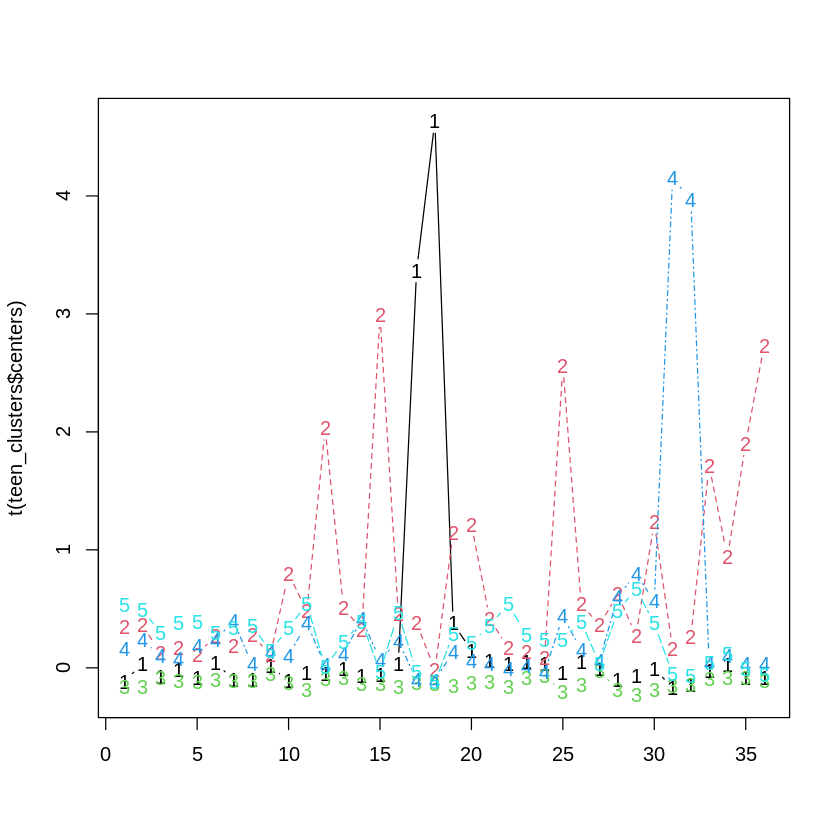

In [ ]:
# 各群詞頻高低視覺化
matplot(t(teen_clusters$centers), type='b')

In [ ]:
colnames(teen_clusters$centers)

[1] "basketball"   "football"     "soccer"       "softball"     "volleyball"  
 [6] "swimming"     "cheerleading" "baseball"     "tennis"       "sports"      
[11] "cute"         "sex"          "sexy"         "hot"          "kissed"      
[16] "dance"        "band"         "marching"     "music"        "rock"        
[21] "god"          "church"       "jesus"        "bible"        "hair"        
[26] "dress"        "blonde"       "mall"         "shopping"     "clothes"     
[31] "hollister"    "abercrombie"  "die"          "death"        "drunk"       
[36] "drugs"

In [ ]:
?write.csv
# write.csv(teen_clusters$centers, file="test.csv")

In [ ]:
# append the cluster IDs to the original data frame
teens$cluster

NULL

In [ ]:
teensResult <- teens
dim(teensResult)

[1] 30000    42

In [ ]:
teensResult

gradyear,gender,age,friends,basketball,football,soccer,softball,volleyball,swimming,⋯,clothes,hollister,abercrombie,die,death,drunk,drugs,female,no_gender,cluster
<int>,<chr>,<dbl>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,⋯,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<dbl>,<dbl>,<int>
2006,M,18.98200,7,0,0,0,0,0,0,⋯,0,0,0,0,0,0,0,0,0,3
2006,F,18.80100,0,0,1,0,0,0,0,⋯,0,0,0,0,0,0,0,1,0,5
2006,M,18.33500,69,0,1,0,0,0,0,⋯,0,0,0,0,1,0,0,0,0,3
2006,F,18.87500,0,0,0,0,0,0,0,⋯,0,0,0,0,0,0,0,1,0,3
2006,NA,18.99500,10,0,0,0,0,0,0,⋯,0,0,0,0,0,1,1,0,1,2
2006,F,18.65586,142,0,0,0,0,0,0,⋯,0,0,0,0,0,1,0,1,0,3
2006,F,18.93000,72,0,0,0,0,0,0,⋯,0,2,0,0,0,0,0,1,0,4
2006,M,18.32200,17,0,0,0,1,0,0,⋯,0,0,0,0,0,0,0,0,0,3
2006,F,19.05500,52,0,0,0,0,0,0,⋯,0,0,0,0,0,0,0,1,0,3


In [ ]:
teensResult$cluster

NULL

In [ ]:
teensResult$cluster <- teen_clusters$cluster
dim(teensResult)

[1] 30000    43

In [ ]:
# look at the first five records
teensResult[1:5, c("cluster", "gender", "age", "friends")]

,cluster,gender,age,friends
,<int>,<chr>,<dbl>,<int>
1,3,M,18.982,7
2,5,F,18.801,0
3,3,M,18.335,69
4,3,F,18.875,0
5,2,NA,18.995,10


In [ ]:
# [1] 畢業年分，性别，年龄，朋友，藍球，
# [6] 足球，足球，壘球，排球，游泳
# [11]啦啦隊，棒球，網球，運動，可爱
# [16]性，性感，火熱，親吻，跳舞
# [21]樂隊，游行，音樂，摇滚，上帝
# [26]教会，耶稣，聖經，頭髮，禮服
# [31]金髮女孩，購物中心，購物，衣服，潮牌Hollister
# [36] Abercrombie & Fitch是一間美國的零售商, 死亡, 死亡，醉酒，毒品

# 模型解讀?:
- 第 4 群: Princessess (與服飾品牌的關係)
- 第 2 群: Criminals (與叛逆與超齡事件的關係)
- 第 3 群: Bastet Cases (諸事漠不關心的一群)
- 第 5 群: Athelete (與運動數字的關係)
- 第 1 群: Brain (有大腦聰明囉!)

In [ ]:
colnames(teen_clusters$centers)

[1] "basketball"   "football"     "soccer"       "softball"     "volleyball"  
 [6] "swimming"     "cheerleading" "baseball"     "tennis"       "sports"      
[11] "cute"         "sex"          "sexy"         "hot"          "kissed"      
[16] "dance"        "band"         "marching"     "music"        "rock"        
[21] "god"          "church"       "jesus"        "bible"        "hair"        
[26] "dress"        "blonde"       "mall"         "shopping"     "clothes"     
[31] "hollister"    "abercrombie"  "die"          "death"        "drunk"       
[36] "drugs"

依據群號將青少年分組並計算各群組的平均年齡 

差異不大 why?

In [ ]:
aggregate(data = teensResult, age ~ cluster, FUN = 'mean', na.rm = TRUE) # mean age by cluster, not vary much by cluster

cluster,age
<int>,<dbl>
1,17.37390
2,17.11795
3,17.29688
4,16.86497
5,17.07861


## 第4群 Princessess (與服飾品牌的關係) 與性別的關係

female 
clothes
hollister
shopping


In [ ]:
## 依據群號將青少年分組並計算各群女生的比例
## 請注意 Princessess (與服飾品牌的關係) 與性別的關係
aggregate(data = teensResult, female ~ cluster, FUN = 'mean') # proportion of females by cluster

cluster,female
<int>,<dbl>
1,0.7323420
2,0.8031038
3,0.6995792
4,0.8381171
5,0.8373157


In [ ]:
aggregate(data = teensResult, clothes ~ cluster, FUN = 'mean')

cluster,clothes
<int>,<dbl>
1,0.14498141
2,0.73132881
3,0.06049556
4,0.41561424
5,0.32672428


In [ ]:
aggregate(data = teensResult, hollister ~ cluster, FUN = 'mean')

cluster,hollister
<int>,<dbl>
1,0.01115242
2,0.12609117
3,0.01603553
4,1.50975890
5,0.05066938


In [ ]:
aggregate(data = teensResult, shopping ~ cluster, FUN = 'mean')

cluster,shopping
<int>,<dbl>
1,0.3035936
2,0.5509214
3,0.1881253
4,0.9311137
5,0.8374852


可以看出2、4、5可能是Princessess: 因為女生比例較高

##第3群:Bastet Cases (諸事漠不關心的一群)

In [ ]:
## 依據群號將青少年分組並計算各群的平均朋友數
## 請注意 Criminals (與叛逆與超齡事件的關係) 與 Bastet Cases (諸事漠不關心的一群) 的平均朋友數
aggregate(data = teensResult, friends ~ cluster, FUN = 'mean') # mean number of friends by cluster

cluster,friends
<int>,<dbl>
1,32.73606
2,30.47915
3,27.66779
4,41.43054
5,37.22115


## 第2群:Criminals (與叛逆與超齡事件的關係) 

In [ ]:
aggregate(data = teensResult, die ~ cluster, FUN = 'mean')

cluster,die
<int>,<dbl>
1,0.1697646
2,1.2550921
3,0.1251987
4,0.2112514
5,0.2084392


In [ ]:
aggregate(data = teensResult, drugs ~ cluster, FUN = 'mean')

cluster,drugs
<int>,<dbl>
1,0.03097893
2,1.00290980
3,0.02141187
4,0.07233065
5,0.03948483


In [ ]:
aggregate(data = teensResult, drunk ~ cluster, FUN = 'mean')

cluster,drunk
<int>,<dbl>
1,0.05328377
2,0.84675073
3,0.05315568
4,0.10218140
5,0.08422301


##第5群: Athelete(與運動的關係)

In [ ]:
aggregate(data = teensResult, basketball ~ cluster, FUN = 'mean')

cluster,basketball
<int>,<dbl>
1,0.1710037
2,0.5431620
3,0.1338008
4,0.3960964
5,0.6973394


In [ ]:
aggregate(data = teensResult, football ~ cluster, FUN = 'mean')

cluster,football
<int>,<dbl>
1,0.2763321
2,0.5072745
3,0.1366526
4,0.4190586
5,0.5990510


In [ ]:
aggregate(data = teensResult, soccer ~ cluster, FUN = 'mean')

cluster,soccer
<int>,<dbl>
1,0.1536555
2,0.3365664
3,0.1409537
4,0.3180253
5,0.4948314


## 第1群: 大腦(Brain)

In [ ]:
aggregate(data = teensResult, marching ~ cluster, FUN = 'mean')
#marching 遊行: 知識分子上街遊行，比較有自己的想法

cluster,marching
<int>,<dbl>
1,1.370508055
2,0.034917556
3,0.001776531
4,0.009184845
5,0.005083884


In [ ]:
aggregate(data = teensResult, music ~ cluster, FUN = 'mean')

cluster,music
<int>,<dbl>
1,1.2118959
2,2.1658584
3,0.5454418
4,0.9104478
5,1.0954076


In [ ]:
## Can we make a table for the five highest words in each cluster?
# apply(teen_clusters$centers, 1, order, decreasing=T)
# apply(teen_clusters$centers, 1, order, decreasing=T)[1:10,]
word_idx <- apply(teen_clusters$centers, 1, order, decreasing=T)[1:20,]
word_idx

1,2,3,4,5
18,15,27,31,29
17,36,9,32,11
19,25,24,29,22
20,12,34,28,1
21,35,23,30,2
26,33,35,25,28
23,30,3,14,16
6,20,13,7,14
2,19,33,11,26
16,34,12,6,5


In [ ]:
word_name <- names(teensResult)[-(c(1:4,41:43))]
word_name

[1] "basketball"   "football"     "soccer"       "softball"     "volleyball"  
 [6] "swimming"     "cheerleading" "baseball"     "tennis"       "sports"      
[11] "cute"         "sex"          "sexy"         "hot"          "kissed"      
[16] "dance"        "band"         "marching"     "music"        "rock"        
[21] "god"          "church"       "jesus"        "bible"        "hair"        
[26] "dress"        "blonde"       "mall"         "shopping"     "clothes"     
[31] "hollister"    "abercrombie"  "die"          "death"        "drunk"       
[36] "drugs"

In [ ]:
word_name[word_idx[ ,1]] # Athelete ? 每次執行或許不同 

[1] "marching" "band"     "music"    "rock"     "god"      "dress"   
 [7] "jesus"    "swimming" "football" "dance"    "church"   "bible"   
[13] "death"    "tennis"   "clothes"  "sexy"     "blonde"   "softball"
[19] "die"      "cute"

In [ ]:
word_name[word_idx[ ,2]] # Basket Cases ?

[1] "kissed"   "drugs"    "hair"     "sex"      "drunk"    "die"     
 [7] "clothes"  "rock"     "music"    "death"    "sports"   "mall"    
[13] "dress"    "sexy"     "cute"     "dance"    "god"      "band"    
[19] "football" "blonde"

In [ ]:
word_name[word_idx[ ,3]] # Princesses ?

[1] "blonde"       "tennis"       "bible"        "death"        "jesus"       
 [6] "drunk"        "soccer"       "sexy"         "die"          "sex"         
[11] "swimming"     "baseball"     "drugs"        "cheerleading" "softball"    
[16] "volleyball"   "god"          "rock"         "sports"       "band"

In [ ]:
word_name[word_idx[ ,4]] # Criminal ?

[1] "hollister"    "abercrombie"  "shopping"     "mall"         "clothes"     
 [6] "hair"         "hot"          "cheerleading" "cute"         "swimming"    
[11] "football"     "dance"        "volleyball"   "basketball"   "dress"       
[16] "music"        "tennis"       "sexy"         "soccer"       "sports"

In [ ]:
word_name[word_idx[ ,5]] # Brain ?

[1] "shopping"     "cute"         "church"       "basketball"   "football"    
 [6] "mall"         "dance"        "hot"          "dress"        "volleyball"  
[11] "softball"     "clothes"      "baseball"     "god"          "sports"      
[16] "cheerleading" "swimming"     "soccer"       "music"        "jesus"

In [ ]:
# seed <- .Random.seed
# write.table(seed, "seed")

# seed <- read.table("seed")
# .Random.seed <- t(seed)

[1] "basketball"   "football"     "soccer"       "softball"     "volleyball"  
 [6] "swimming"     "cheerleading" "baseball"     "tennis"       "sports"      
[11] "cute"         "sex"          "sexy"         "hot"          "kissed"      
[16] "dance"        "band"         "marching"     "music"        "rock"        
[21] "god"          "church"       "jesus"        "bible"        "hair"        
[26] "dress"        "blonde"       "mall"         "shopping"     "clothes"     
[31] "hollister"    "abercrombie"  "die"          "death"        "drunk"       
[36] "drugs"

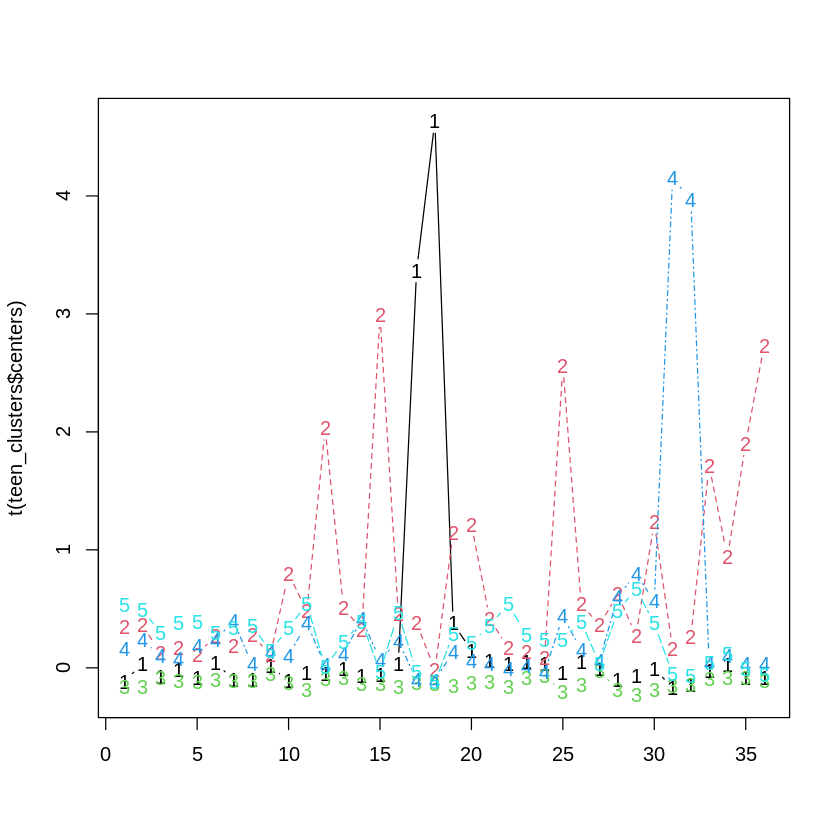

In [ ]:
matplot(t(teen_clusters$centers), type='b')
colnames(teen_clusters$centers)